In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocessing
from utils import plot_figures

# GPT-4o vs. Crowd Workers' Annotation

This notebook will show the result of annotations from human and gpt-4o and their agreement rates.

Supplementary Figure S3

### Loading GPT - 4o's Annotation

In [2]:

categories = ['disruptive', 'consolidating', 'notexposed']
types = ['consistency', 'automation', 'mental','how']  

dataframes = {}

for category in categories:
    for dtype in types:
        key = f'{category}_represent_{dtype}'
        file_path = f'../data/processed/GPT_VS_Human/finalized_gpt_responses_{category}_{dtype}_082724.csv'
        dataframes[key] = pd.read_csv(file_path)
        dataframes[key] = dataframes[key].drop(columns = ['Unnamed: 0'])       

In [3]:
gpt_how = preprocessing.gpt_answer_preprocessing( dataframes['disruptive_represent_how'],
                         dataframes['consolidating_represent_how'],
                        dataframes['notexposed_represent_how'],
                         "how")

In [4]:
gpt_mental  = preprocessing.gpt_answer_preprocessing(dataframes['disruptive_represent_mental'],
                         dataframes['consolidating_represent_mental'],
                        dataframes['notexposed_represent_mental'],
                         "mental")

In [5]:
gpt_consistency  = preprocessing.gpt_answer_preprocessing(dataframes['disruptive_represent_consistency'],
                         dataframes['consolidating_represent_consistency'],
                        dataframes['notexposed_represent_consistency'],
                         "consistency"
    
)

In [6]:
gpt_substitution =  preprocessing.gpt_answer_preprocessing(dataframes['disruptive_represent_automation'],
                         dataframes['consolidating_represent_automation'],
                        dataframes['notexposed_represent_automation'],
                         "impact"
    
)

### Calculating Z-score

#### How

In [7]:
z_score_how_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_how'],
                         dataframes['consolidating_represent_how'],
                        dataframes['notexposed_represent_how'],
                         "how")

In [8]:
z_score_how_gpt

how,D,T
Category,,
Consolidating,1.589548,-1.589548
Disruptive,-0.367292,0.367292
Not Exposed,-1.283225,1.283225


#### Mental

In [9]:
z_score_mental_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_mental'],
                         dataframes['consolidating_represent_mental'],
                        dataframes['notexposed_represent_mental'],
                         "mental")

In [10]:
z_score_mental_gpt

mental,M,P
Category,,
Consolidating,-2.090583,2.090583
Disruptive,1.347219,-1.347219
Not Exposed,0.976207,-0.976207


#### Consistency

In [11]:
z_score_consistency_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_consistency'],
                         dataframes['consolidating_represent_consistency'],
                        dataframes['notexposed_represent_consistency'],
                         "consistency")

In [12]:
z_score_consistency_gpt

consistency,R,V
Category,,
Consolidating,1.899457,-1.899457
Disruptive,-0.764649,0.764649
Not Exposed,-1.178008,1.178008


#### Augmentation vs Automation

In [13]:
z_score_augmentation_gpt = preprocessing.null_model_zscore(dataframes['disruptive_represent_automation'],
                         dataframes['consolidating_represent_automation'],
                        dataframes['notexposed_represent_automation'],
                         "impact")

In [14]:
z_score_augmentation_gpt

impact,HWA,HWS
Category,,
Consolidating,-1.024085,1.024085
Disruptive,0.441091,-0.441091
Not Exposed,0.609489,-0.609489


### Loading Human Annotators

#### Task ID for different task sets

In [15]:
disruptive_task_ids = set(dataframes['disruptive_represent_how']['Task_id'])
consolidating_task_ids = set(dataframes['consolidating_represent_how']['Task_id'])
notexposed_task_ids = set(dataframes['notexposed_represent_how']['Task_id'])

In [16]:
human_answers = pd.read_csv('../data/processed/GPT_VS_Human/finalized_human_annotator_responses_082725.csv')

In [17]:
human_answers ['Q4'].fillna("Not Impacted", inplace=True)

/tmp/ipykernel_40002/3831553328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  human_answers ['Q4'].fillna("Not Impacted", inplace=True)


#### Calculating Z-score

In [18]:
z_score_how_human = preprocessing.null_model_zscore(human_answers[human_answers['Task'].apply(lambda x: x in disruptive_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in consolidating_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in notexposed_task_ids)],
                                "Q1")

In [19]:
z_score_how_human.columns = ['D','T']

In [20]:
z_score_how_human

,D,T
Category,,
Consolidating,1.128522,-1.128522
Disruptive,-0.547987,0.547987
Not Exposed,-0.606066,0.606066


In [21]:
z_score_mental_human = preprocessing.null_model_zscore(human_answers[human_answers['Task'].apply(lambda x: x in disruptive_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in consolidating_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in notexposed_task_ids)],
                                "Q3")

In [22]:
z_score_mental_human.columns = ['M', 'P']

In [23]:
z_score_mental_human

,M,P
Category,,
Consolidating,-3.011499,3.011499
Disruptive,2.706061,-2.706061
Not Exposed,0.649986,-0.649986


In [104]:
z_score_consistency_human = preprocessing.null_model_zscore(human_answers[human_answers['Task'].apply(lambda x: x in disruptive_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in consolidating_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in notexposed_task_ids)],
                                "Q2")

In [105]:
z_score_consistency_human.columns = ['R', 'V']

In [106]:
z_score_consistency_human

,R,V
Category,,
Consolidating,-0.187551,0.187551
Disruptive,-1.890623,1.890623
Not Exposed,1.965523,-1.965523


In [26]:
z_score_automation_human= preprocessing.null_model_zscore(human_answers[human_answers['Task'].apply(lambda x: x in disruptive_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in consolidating_task_ids)],
                                human_answers[human_answers['Task'].apply(lambda x: x in notexposed_task_ids)],
                                "Q4")

In [27]:
z_score_automation_human.columns = ['Not Impacted','HWA', 'HWS']

In [28]:
z_score_automation_human

,Not Impacted,HWA,HWS
Category,,,
Consolidating,0.256025,-2.644202,2.454791
Disruptive,-0.375153,2.627128,-2.507014
Not Exposed,0.093720,0.104173,-0.198511


## Plotting Figures

#### Collaborative

In [29]:
human_proportions = np.array([ z_score_how_human.loc['Disruptive'], z_score_how_human.loc['Consolidating'], z_score_how_human.loc['Not Exposed']]).T

In [30]:
human_proportions = np.concatenate([human_proportions[1],human_proportions[0]])

In [31]:
gpt_proportions = np.array([ z_score_how_gpt.loc['Disruptive'], z_score_how_gpt.loc['Consolidating'], z_score_how_gpt.loc['Not Exposed']]).T


In [32]:
gpt_proportions = np.concatenate([gpt_proportions[1],gpt_proportions[0]])



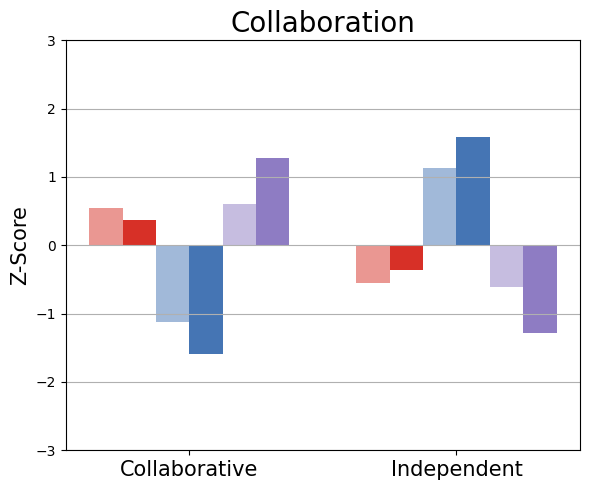

In [33]:
plot_figures.zscore_original_characteristics(human_proportions, 
                                              gpt_proportions, 
                                             'Collaboration',
                                              ['Collaborative', 'Independent'], 
                                              '../results/figures/Supplementary_Collaboration_GPT_vs_Human.png')

#### Cognition

In [34]:
human_proportions = np.array([ z_score_mental_human.loc['Disruptive'], z_score_mental_human.loc['Consolidating'], z_score_mental_human.loc['Not Exposed']]).T

In [35]:
human_proportions = np.concatenate([human_proportions[0],human_proportions[1]])

In [36]:
gpt_proportions = np.array([ z_score_mental_gpt.loc['Disruptive'], z_score_mental_gpt.loc['Consolidating'], z_score_mental_gpt.loc['Not Exposed']]).T


In [37]:
gpt_proportions = np.concatenate([gpt_proportions[0],gpt_proportions[1]])



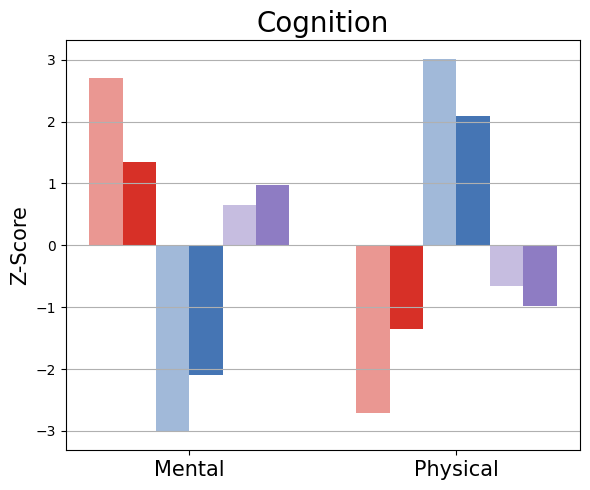

In [38]:

plot_figures.zscore_original_characteristics(human_proportions, 
                                              gpt_proportions, 
                                             'Cognition',
                                              ['Mental', 'Physical'], 
                                              '../results/figures/Supplementary_Cognition_GPT_vs_Human.png')

#### Repetitiveness

In [107]:
human_proportions = np.array([ z_score_consistency_human.loc['Disruptive'], z_score_consistency_human.loc['Consolidating'], z_score_consistency_human.loc['Not Exposed']]).T

human_proportions = np.concatenate([human_proportions[1],human_proportions[0]])

In [108]:
gpt_proportions = np.array([ z_score_consistency_gpt.loc['Disruptive'], z_score_consistency_gpt.loc['Consolidating'], z_score_consistency_gpt.loc['Not Exposed']]).T


gpt_proportions = np.concatenate([gpt_proportions[1],gpt_proportions[0]])



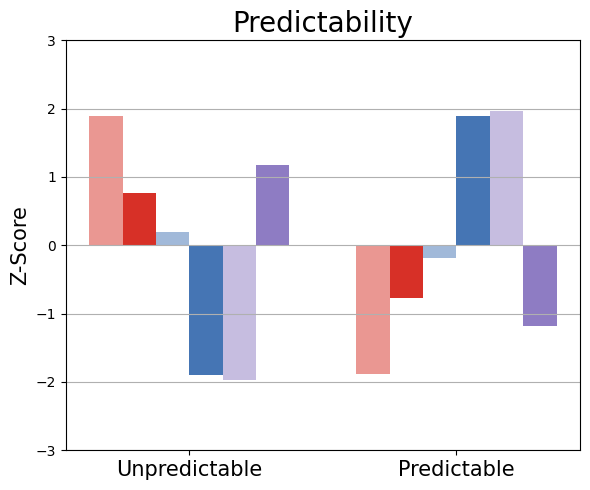

In [109]:

plot_figures.zscore_original_characteristics(human_proportions, 
                                              gpt_proportions, 
                                             'Predictability',
                                              ['Unpredictable', 'Predictable'], 
                                              '../results/figures/Supplementary_Predictability_GPT_vs_Human.png')

#### Augmentation Potential

In [42]:
human_proportions = np.array([ z_score_automation_human.loc['Disruptive'], z_score_automation_human.loc['Consolidating'], z_score_automation_human.loc['Not Exposed']]).T

human_proportions = np.concatenate([human_proportions[1],human_proportions[2],human_proportions[0]])




In [43]:
gpt_proportions = np.array([ z_score_augmentation_gpt.loc['Disruptive'],z_score_augmentation_gpt.loc['Consolidating'], z_score_augmentation_gpt.loc['Not Exposed']]).T


gpt_proportions = np.concatenate([gpt_proportions[0],gpt_proportions[1], [0,0,0]])



here


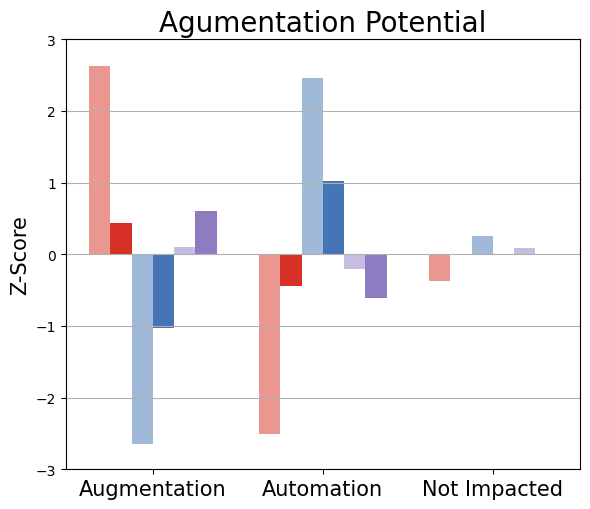

In [45]:
plot_figures.zscore_original_characteristics(human_proportions, 
                                              gpt_proportions, 
                                             'Agumentation Potential',
                                              ['Augmentation', 'Automation','Not Impacted'], 
                                              '../results/figures/Supplementary_Augmentation_GPT_vs_Human.png')